<h1>Лабораторна робота №2 <h1>
<h2>Пруніч Сергій МІТ-31<h2>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller


                F1           F2           F3           F4           F5  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.038515    -0.076254     0.007639    -0.021902     0.027731   
std       1.005244     1.018906     1.029122     1.011087     0.996968   
min      -3.397163    -3.290002    -3.164861    -3.081249    -3.294078   
25%      -0.619134    -0.771141    -0.670395    -0.705341    -0.644191   
50%       0.014181    -0.059270    -0.002738    -0.024959     0.086246   
75%       0.681312     0.605334     0.723648     0.666741     0.684428   
max       3.048158     3.605764     3.770933     3.774140     3.556407   

                F6       Target  
count  1500.000000  1500.000000  
mean     -0.018494     2.708005  
std       0.993765   126.778163  
min      -3.131274  -436.806173  
25%      -0.688150   -82.686230  
50%       0.001441     7.139959  
75%       0.647484    89.773187  
max       3.677986   472.552491  
---------------------------

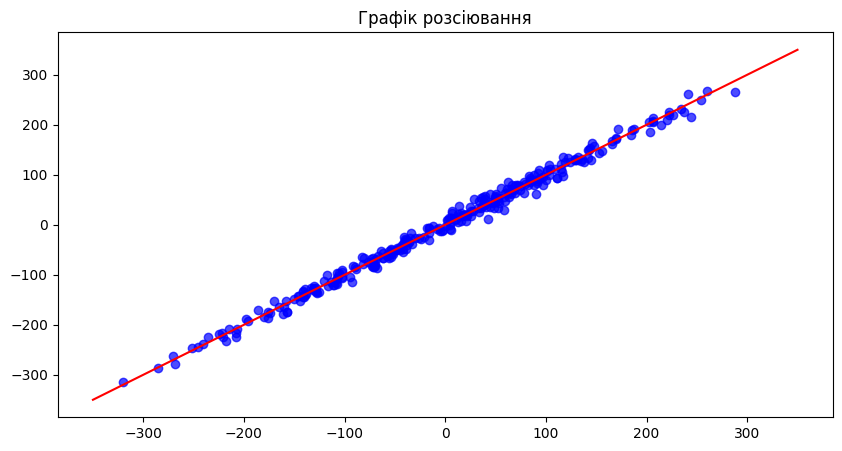

In [11]:
# Частина 1
num_features = 6
X, y = make_regression(n_samples=1500, n_features=num_features, n_informative=4, noise=10, random_state=25)
data = pd.DataFrame(X, columns=[f"F{i+1}" for i in range(num_features)])
data['Target'] = y
data.to_csv('data_regresion.csv', index=False)
print(data.describe())
print("-----------------------------------------------------")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

model_regresion = LinearRegression()
model_regresion.fit(X_train,y_train)
y_pred_model_reg = model_regresion.predict(X_test)

mse = mean_squared_error(y_test,y_pred_model_reg)
mae = mean_absolute_error(y_test,y_pred_model_reg)
print("MSE (середньоабсолютна помилка) = " , mse)
print("MAE (середньоквадратична помилка) = " , mae)
print("-----------------------------------------------------")
plt.figure(figsize=(10,5))
plt.title("Графік розсіювання")
plt.xlabel=("Фактичні значення")
plt.ylabel=("Передбаченні значення")
x = np.linspace(-350, 350)
plt.plot(x, x, label='y = x', color = "red")
plt.scatter(y_test, y_pred_model_reg, c="blue", alpha=0.7)
plt.show()

            Temp
Date            
1990-10-01  11.3
1990-10-02  10.5
1990-10-03   9.9
1990-10-04  11.0
1990-10-05  14.0
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[92 rows x 1 columns]
Augmented Dickey-Fuller test:
* ADF Statistic: -4.82
* p-value: 0.00

Critical values:
* 1%: -3.50
* 5%: -2.89
* 10%: -2.58


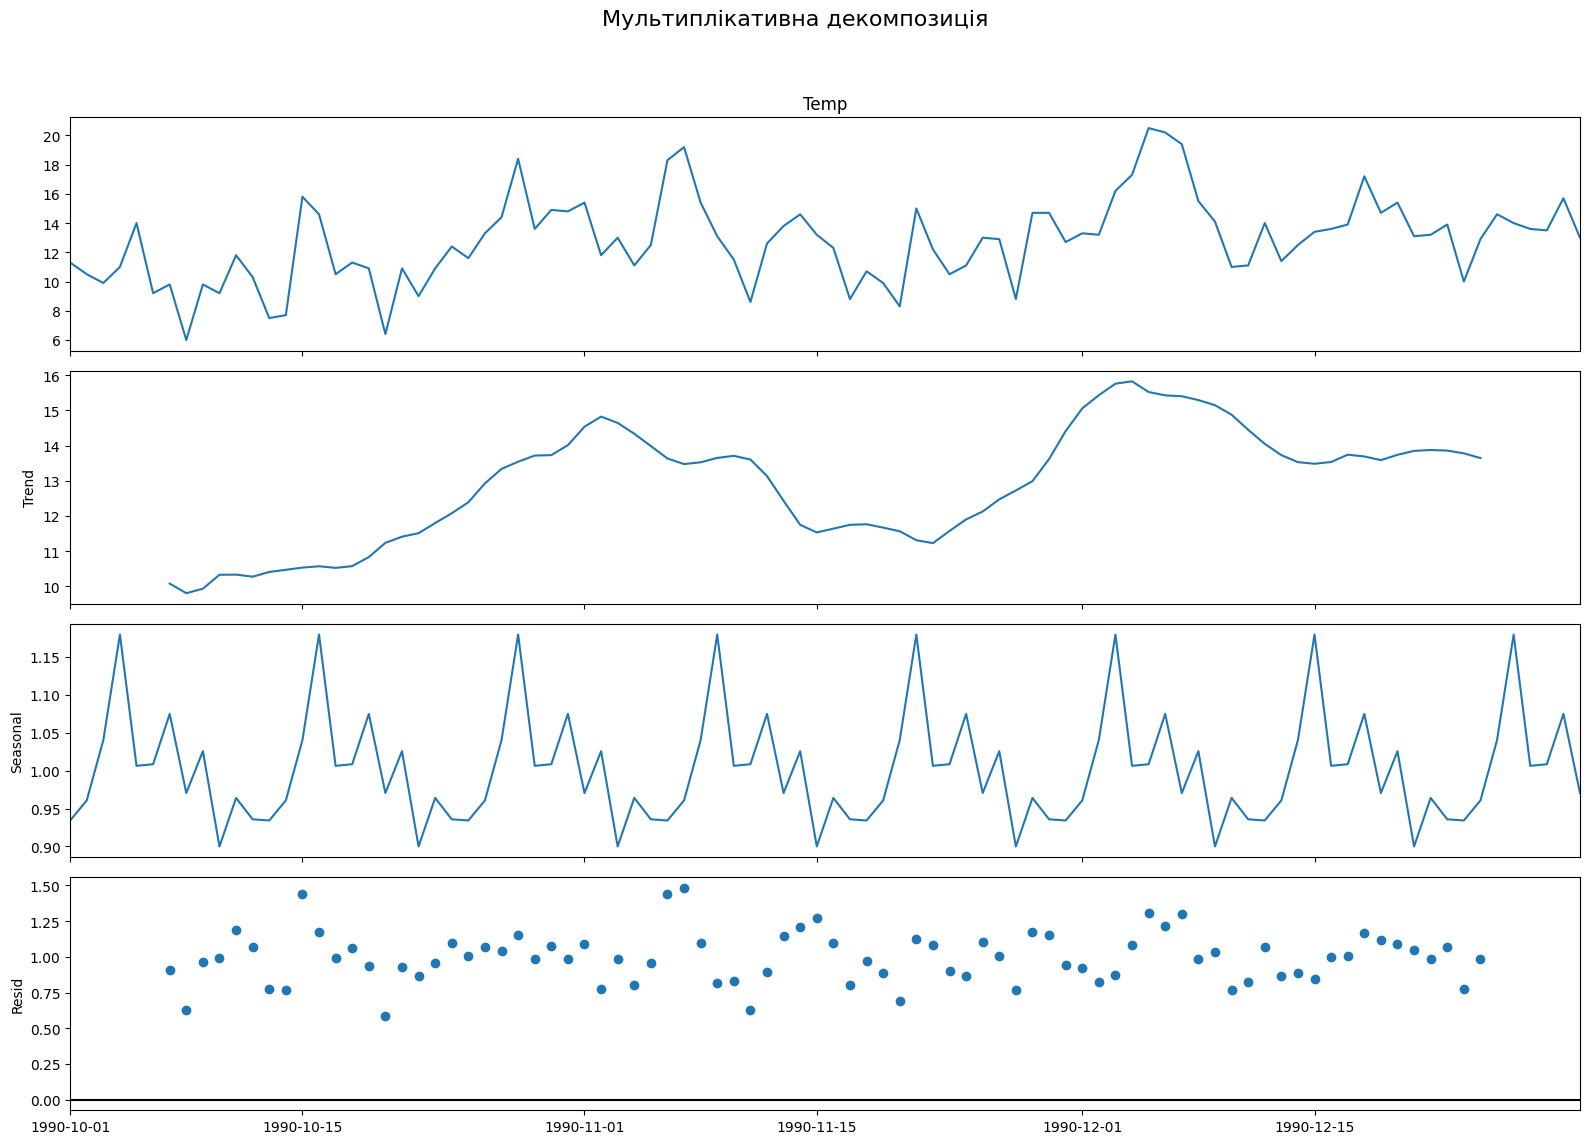

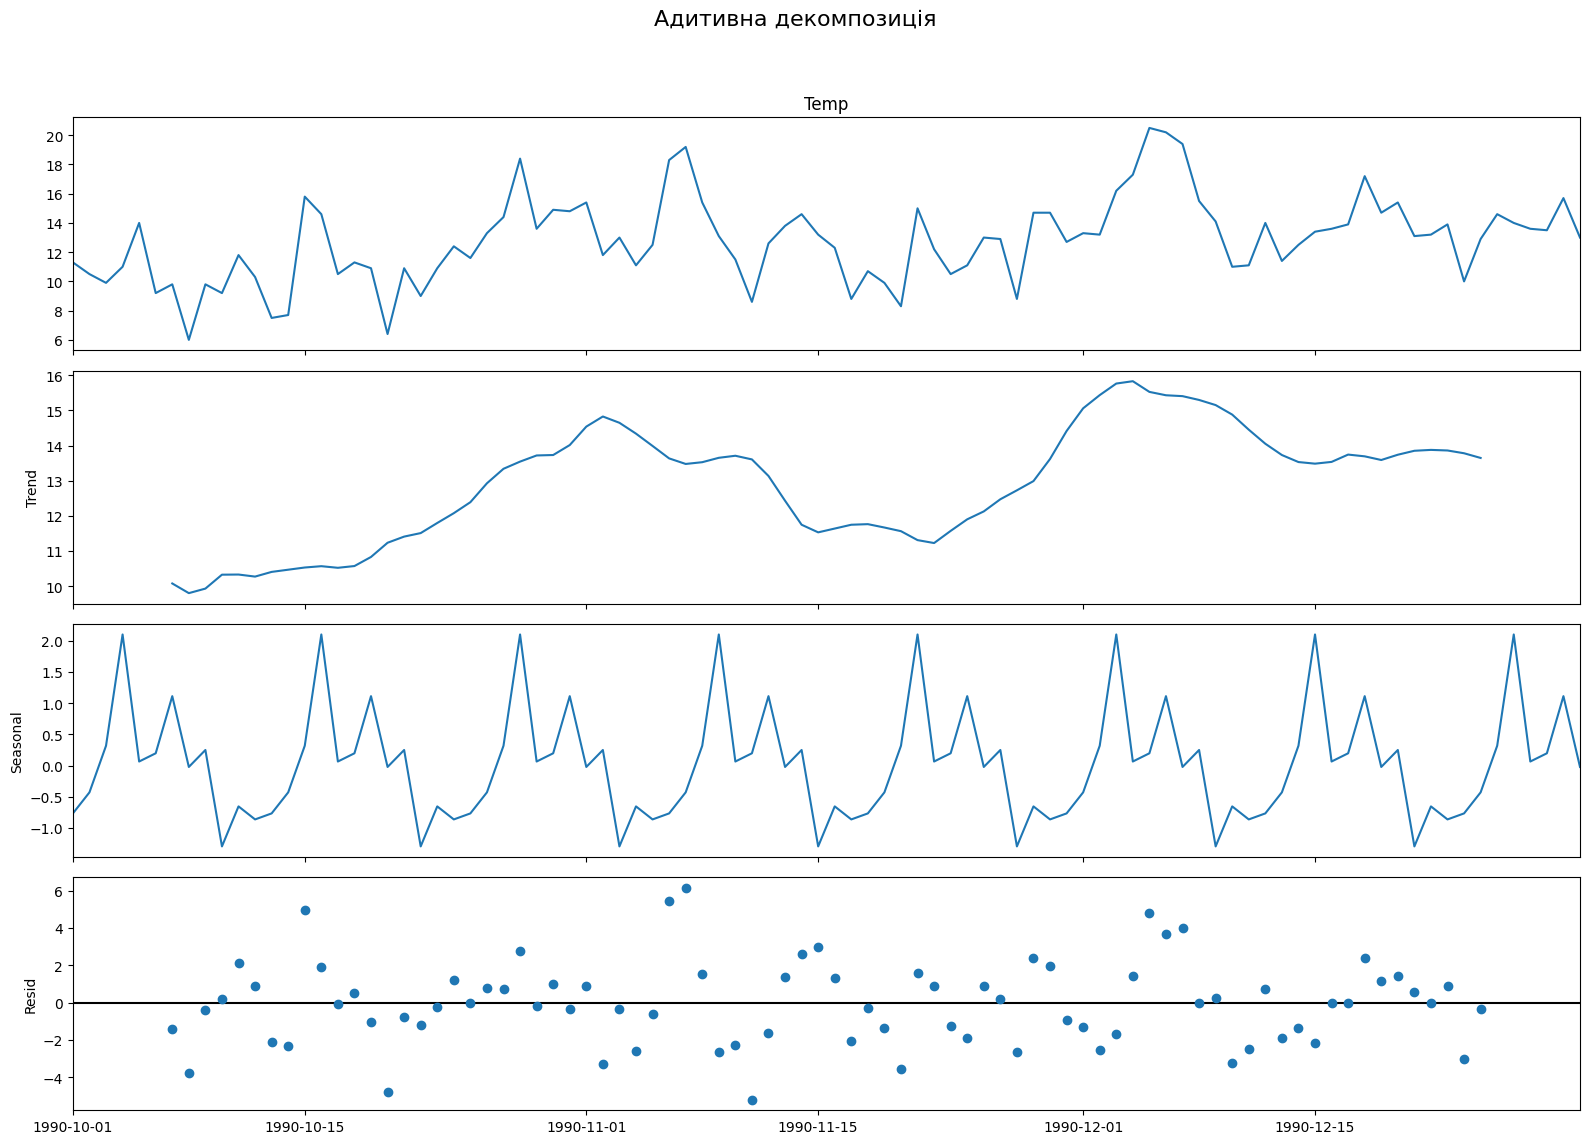

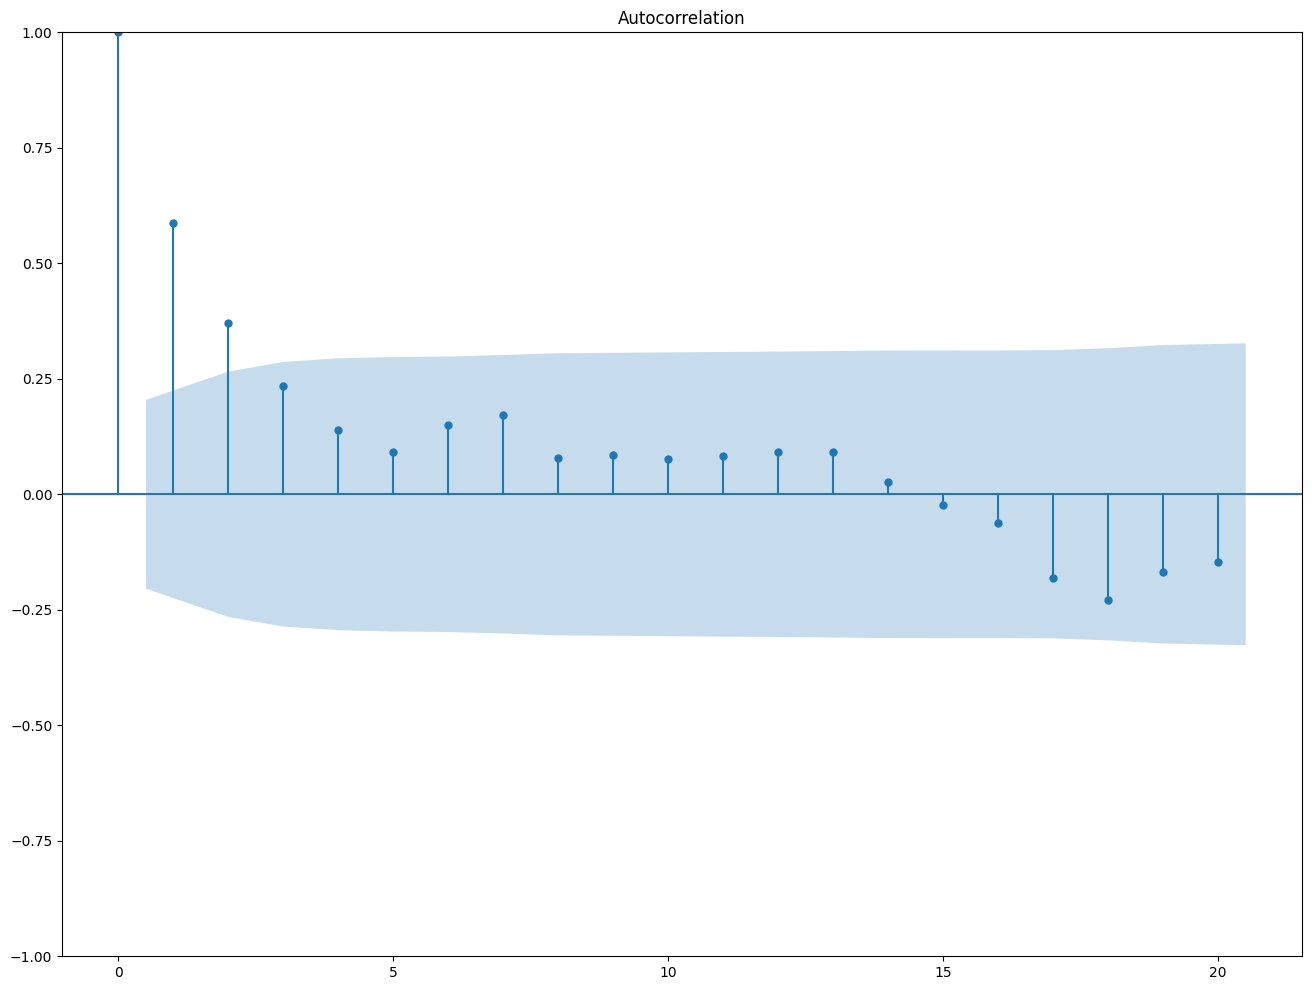

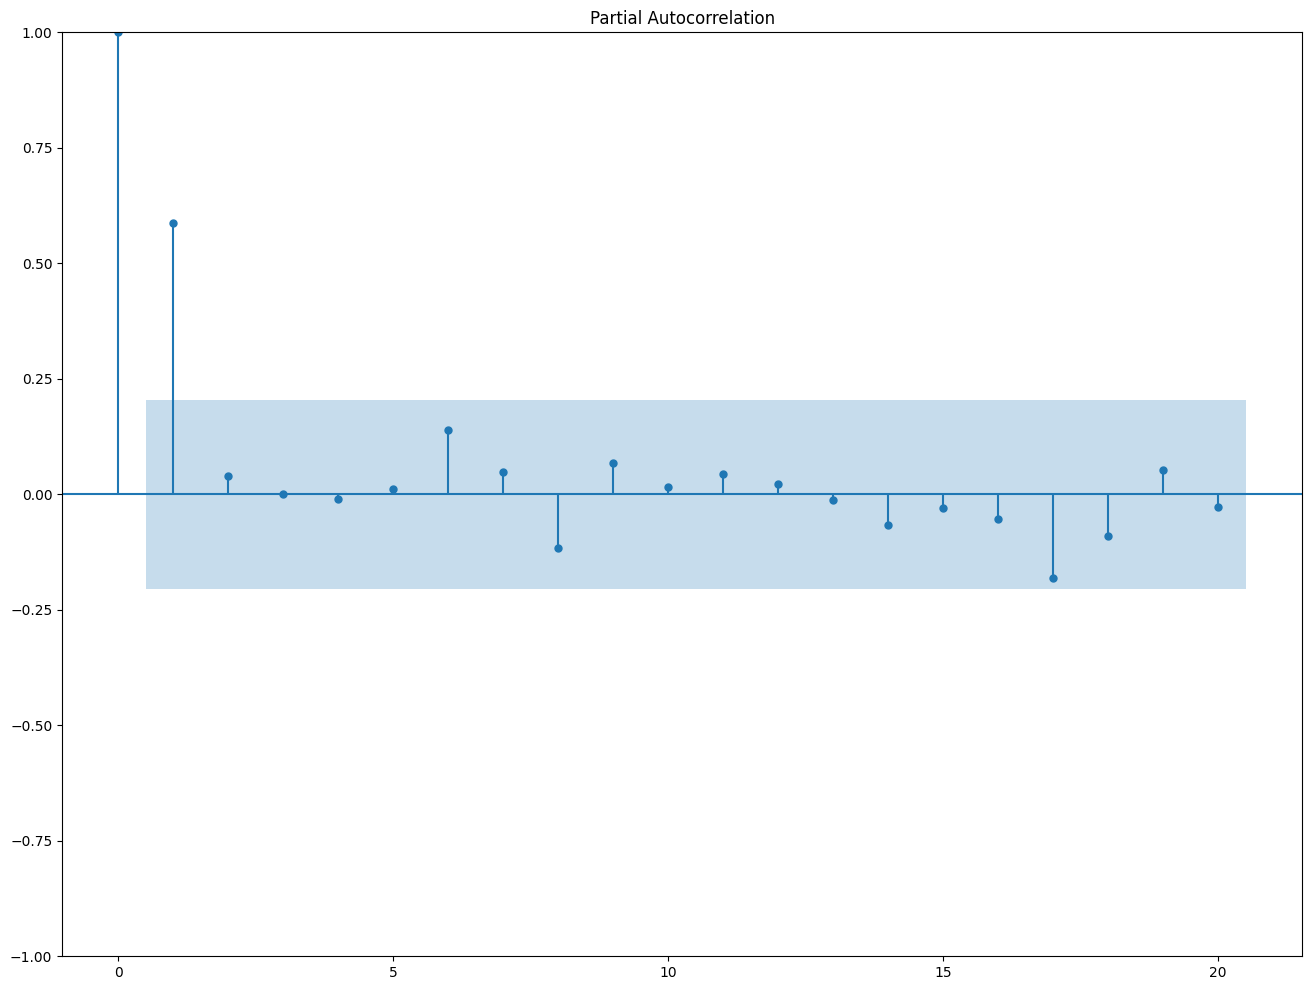

1991-01-01    14.144689
1991-01-02    12.599712
1991-01-03    15.212794
1991-01-04    15.860567
1991-01-05    15.103250
1991-01-06    16.415131
1991-01-07    17.249456
1991-01-08    18.099609
1991-01-09    16.901102
1991-01-10    16.958495
1991-01-11    17.487326
1991-01-12    16.184569
1991-01-13    15.790387
1991-01-14    15.216574
1991-01-15    14.437289
1991-01-16    14.042573
1991-01-17    16.490231
1991-01-18    15.636602
1991-01-19    16.072488
1991-01-20    18.000243
1991-01-21    15.992300
1991-01-22    14.708824
1991-01-23    16.189257
1991-01-24    15.379971
1991-01-25    16.268283
1991-01-26    14.683988
1991-01-27    15.809840
1991-01-28    15.513182
1991-01-29    15.067039
1991-01-30    16.064012
Freq: D, Name: predicted_mean, dtype: float64
            lower Temp  upper Temp
1991-01-01    9.638534   18.650843
1991-01-02    7.383053   17.816372
1991-01-03    9.847583   20.578006
1991-01-04   10.401045   21.320088
1991-01-05    9.636780   20.569721
1991-01-06   10.954960  

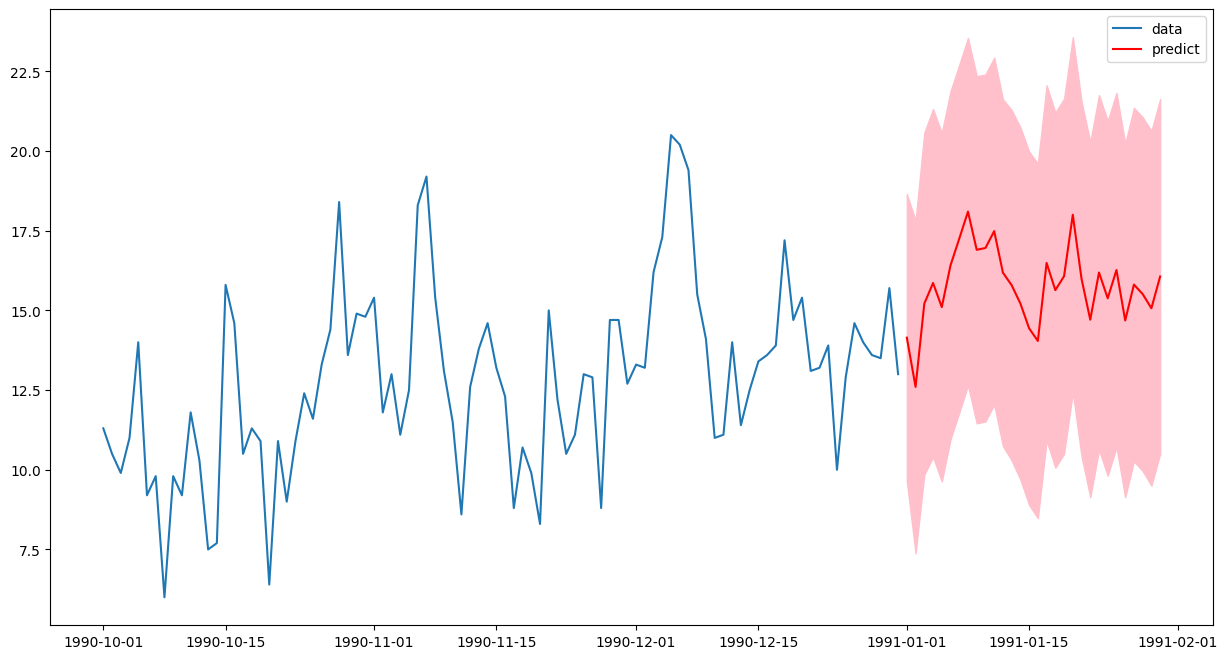

In [82]:
# Частина 2

data =pd.read_csv("daily-min-temperatures.csv")


# series_value = data.values
# value = pd.DataFrame(series_value)
data_series = pd.concat([data["Date"],data['Temp']], axis=1)
data_series=data_series.head(92)
data_series.columns = ["Date",'Temp']

data_series['Date'] = pd.to_datetime(data_series['Date'])
data_series.set_index('Date', inplace=True)
# data_series = data_series.iloc[::-1]
data_series['Temp'] = pd.to_numeric(data_series['Temp'])
print(data_series)

# Розділення часового ряду на тренд, сезонні
result = adfuller(data_series)
print("Augmented Dickey-Fuller test:")
print(f'* ADF Statistic: {result[0]:.2f}')
print(f'* p-value: {result[1]:.2f}')
print('\nCritical values:')
for key, value in result[4].items():
    print(f'* {key}: {value:.2f}')


decomposition = seasonal_decompose(data_series['Temp'], model='multiplicaptive',period=12)
additive_decomposition = seasonal_decompose(data_series['Temp'], model='additive', period=12)
# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.figure(figsize=(15, 10))
# plt.subplot(411)
# plt.plot(data, label='Часова лінія')
# plt.legend(loc='upper left')
# plt.subplot(412)
# plt.plot(trend, label='Тренд')
# plt.legend(loc='upper left')
# plt.subplot(413)
# plt.plot(seasonal, label='Сезонність')
# plt.legend(loc='upper left')
# plt.subplot(414)
# plt.plot(residual, label='Залишкові')
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()

plt.rcParams.update({'figure.figsize': (16,12)})
decomposition.plot().suptitle('Мультиплікативна декомпозиція', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
additive_decomposition.plot().suptitle('Адитивна декомпозиція', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plot_acf(data_series)
plot_pacf(data_series)
plt.show()

order = (4, 1, 1)
seasonal_order = (4, 1, 1, 12)
model = SARIMAX(data_series['Temp'], order=order, seasonal_order=seasonal_order)
results = model.fit()

forecast_dates = pd.date_range(start='1991-01-1', end='1991-01-30', freq='D')
forecast = results.get_forecast(steps=len(forecast_dates))
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

print(forecast_values)
print(conf_int)

plt.figure(figsize=(15,8))
plt.plot(data_series.index, data_series['Temp'], label='data')
plt.plot(forecast_dates, forecast_values, color='red', label='predict')
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink')
plt.legend()
plt.show()


кількість рядків до видалення рядків з nan 2930
кількість рядків після видалення рядків з nan 2421 

Середньоквадратична помилка (MSE): 2286577595.904546
Середня абсолютна помилка (MAE): 23748.38755721587
R2: 0.7122668997229343


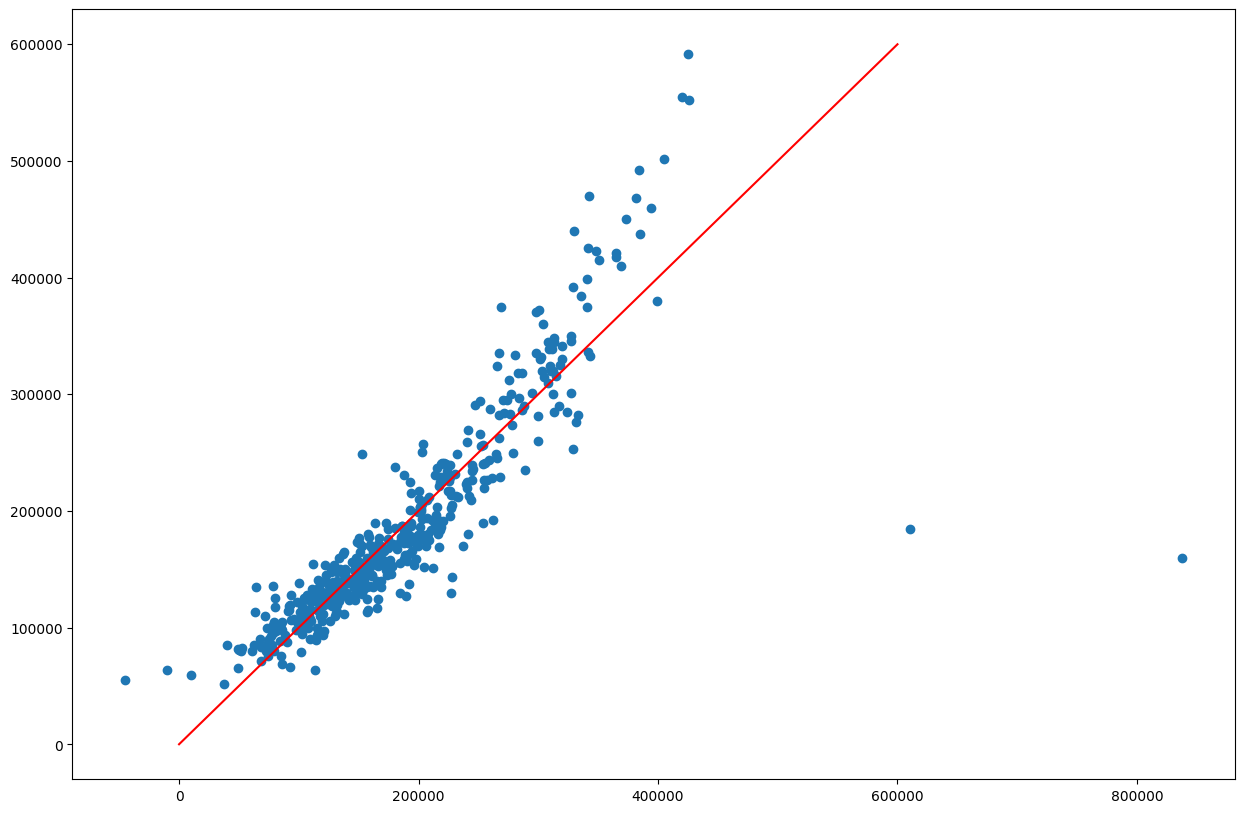

In [91]:
# Частина 3
data = pd.read_csv('AmesHousing.csv')

# Визначимо змінні для нашої моделі
data_cut = [
    'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
    'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
    'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF',
    'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
    'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
    'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
    'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'
]

new_data = data[data_cut]

#в цьому випадку ми просто заміняємо певну кількість рідків з nan на середнє значення(Можна було і видалити, але тоді зросте похибка вдвічі)
print("кількість рядків до видалення рядків з nan", len(new_data))
new_data.dropna(inplace=True)
# new_data.fillna(new_data.mean(), inplace=True)
print("кількість рядків після видалення рядків з nan",len(new_data), "\n")

new_data["MS Zoning"] = new_data["MS Zoning"].replace({'RL': 0, 'RH': 1, 'RM': 2, 'FV' : 3, 'C (all)' : 4, 'I (all)' : 5, 'A (agr)' : 6})

y = new_data['SalePrice']
X = new_data.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Оцінка точності моделі
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Середньоквадратична помилка (MSE): {mse}")
print(f"Середня абсолютна помилка (MAE): {mae}")
print(f"R2: {r2}")

#побудова графіку
plt.figure(figsize=(15,10))
x = np.linspace(0, 600000)
plt.plot(x, x, label='y = x', color = "red")
plt.scatter(y_pred, y_test, label='Дані')
# plt.xlabel("predict")
# plt.ylabel("real")
plt.show()